In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [19]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx', 'implementation_names.xlsx', 'query.xlsx', 'count_implementation_rate.xlsx', 'count_sql.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink
0,Activiti,automation,1,0,1,1,0,1,0
1,airbyte,infrastructure management,0,1,0,0,0,0,0
2,airsonic,media,1,0,0,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,1,0,0,1,0
4,nacos,infrastructure management,1,0,0,0,0,0,0


In [20]:
data_with_index = df.set_index("Projects")
#data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
data_with_index = data_with_index.drop(columns='JPA')
data_with_index.head()

,Domains,mybatis,jOOQ,Spring,JDBC,Hibernate,EclipseLink
Projects,,,,,,,
Activiti,automation,1,0,1,0,1,0
airbyte,infrastructure management,0,1,0,0,0,0
airsonic,media,1,0,0,0,0,1
spring-cloud-alibaba,infrastructure management,0,0,1,0,1,0
nacos,infrastructure management,1,0,0,0,0,0


In [21]:
data_jpa = df[["Projects", "Domains", "JPA"]].copy()
data_jpa.iloc[: , 2:].sum().sort_values(ascending=False)

JPA    67
dtype: int64

In [22]:
data_with_index.iloc[: , 1:].sum().sort_values(ascending=False)

mybatis        155
Hibernate       94
Spring          45
EclipseLink     14
jOOQ             7
JDBC             0
dtype: int64

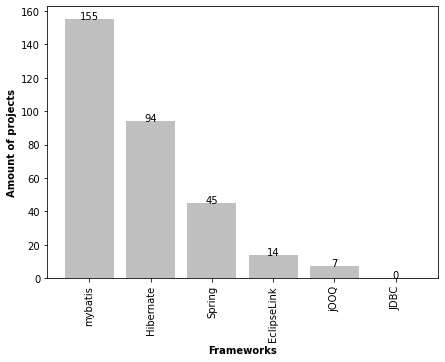

In [23]:
plt.figure(figsize=(7,5))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center') #

df = data_with_index.iloc[: , 1:].sum().sort_values(ascending=False)
plt.bar(df.index, df.values, color='silver')
addlabels(df.index, df.values)
plt.xticks(rotation=90)

plt.xlabel("Frameworks", fontweight = "bold")
plt.ylabel("Amount of projects", fontweight = "bold")
plt.show() 

In [24]:
from util import USAGE_FAN_IN_FILE
df = pd.read_excel(USAGE_FAN_IN_FILE, engine = 'openpyxl')
df.head()
#data_with_index = df.set_index("Projects")
#data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
#data_with_index.reset_index(inplace=True)

,Projects,DB-Code(Java),DB-Code(XML),Dependencies,Total-DB,Total-Project,Rate
0,Activiti,14,62,14,90,4872,1.847291
1,airbyte,35,0,37,72,6172,1.166559
2,airsonic,1,2,0,3,1535,0.195440
3,spring-cloud-alibaba,0,3,0,3,645,0.465116
4,nacos,1,3,2,6,1939,0.309438


In [25]:
data_with_index = df.iloc[: , :].sort_values(by='N Total DB', ascending=False)
#data_with_index = df.iloc[: , :].sort_values(by='Total-DB', ascending=False)
data_with_index.head()

KeyError: 'N Total DB'

In [ ]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 + 1.5 * IQR

    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [ ]:
index_list = []
#for feature in ['DB-Code Test', 'DB-Code Java']:
for feature in ['DB-Code(Java)', 'Dependencies']:
    index_list.extend(outliers(df, feature))

In [ ]:
index_list

[0,
 1,
 2,
 4,
 19,
 20,
 29,
 30,
 34,
 35,
 40,
 42,
 44,
 47,
 49,
 50,
 71,
 72,
 73,
 81,
 83,
 84,
 88,
 89,
 92,
 105,
 116,
 121,
 122,
 123,
 127,
 130,
 133,
 153,
 161,
 163,
 179,
 181,
 182,
 183,
 186,
 189,
 191,
 194,
 199,
 202,
 205,
 208,
 209,
 213,
 217,
 222,
 224,
 226,
 242,
 253,
 267,
 269,
 276,
 282,
 290,
 291,
 292,
 305,
 307,
 313,
 0,
 1,
 4,
 20,
 29,
 30,
 34,
 40,
 42,
 44,
 47,
 49,
 50,
 55,
 66,
 73,
 76,
 77,
 81,
 82,
 88,
 89,
 92,
 105,
 116,
 121,
 123,
 127,
 130,
 133,
 135,
 153,
 155,
 161,
 163,
 173,
 179,
 181,
 182,
 183,
 189,
 191,
 195,
 202,
 205,
 209,
 213,
 217,
 222,
 224,
 226,
 242,
 258,
 267,
 273,
 282,
 289,
 290,
 291,
 292,
 305,
 313]

In [ ]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [ ]:
df_cleaned = remove(df, index_list)
df_cleaned.head()

,Projects,DB-Code(Java),DB-Code(XML),Dependencies,Total-DB,Total-Project,Rate
3,spring-cloud-alibaba,0,3,0,3,645,0.465116
5,alluxio,0,0,0,0,3470,0.000000
6,VirtualXposed,0,0,0,0,823,0.000000
7,angel,0,0,0,0,2733,0.000000
8,Anki-Android,0,0,0,0,3030,0.000000


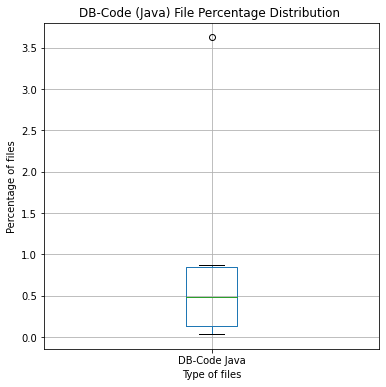

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize =(6, 6))

#stud_bplt = df_cleaned.boxplot(column=['DB-Code Test'])
#stud_bplt = df.boxplot(column=['Total DB'])
stud_bplt = df.boxplot(column=['DB-Code Java'])

stud_bplt.plot()
plt.title("DB-Code (Java) File Percentage Distribution ")
plt.xlabel("Type of files")
plt.ylabel("Percentage of files")
plt.show()

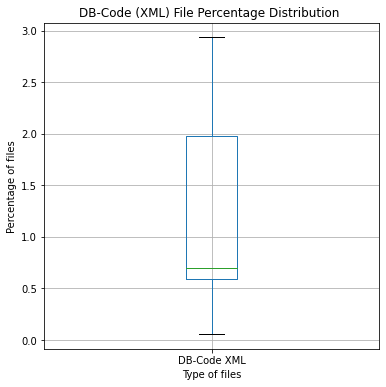

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['DB-Code XML'])

stud_bplt.plot()
plt.title("DB-Code (XML) File Percentage Distribution ")
plt.xlabel("Type of files")
plt.ylabel("Percentage of files")
plt.show()

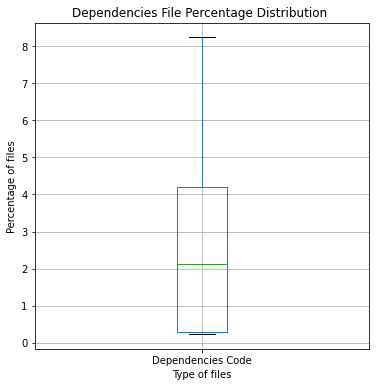

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['Dependencies Code'])

stud_bplt.plot()
plt.title("Dependencies File Percentage Distribution ")
plt.xlabel("Type of files")
plt.ylabel("Percentage of files")
plt.show()

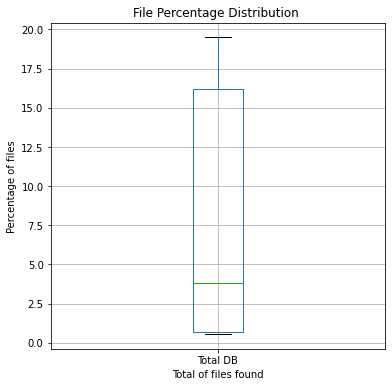

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(6, 6))
stud_bplt = df.boxplot(column=['Total DB'])

stud_bplt.plot()
plt.title("File Percentage Distribution ")
plt.xlabel("Total of files found")
plt.ylabel("Percentage of files")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(13, 6))
stud_bplt = df.boxplot(column=['DB-Code(Java) Rate', 'DB-Code(XML) Rate', 'Dependencies Rate', 'Rate'])

stud_bplt.plot()
plt.title("Distribution of files")
plt.show()

In [ ]:
from apyori import apriori

rules = apriori(data_with_index, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

results = list(rules)
results = pd.DataFrame(results)
results.head(5)

,items,support,ordered_statistics
0,"((, ))",0.285714,"[(((), ()), 1.0, 3.5), (()), ((), 1.0, 3.5)]"
1,"(C, ()",0.285714,"[(((), (C), 1.0, 3.5), ((C), ((), 1.0, 3.5)]"
2,"(J, ()",0.142857,"[(((), (J), 0.5, 3.5), ((J), ((), 1.0, 3.5)]"
3,"(L, ()",0.142857,"[(((), (L), 0.5, 3.5), ((L), ((), 1.0, 3.5)]"
4,"(M, ()",0.142857,"[(((), (M), 0.5, 3.5), ((M), ((), 1.0, 3.5)]"


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.iloc[: , 2:]

frq_items = apriori(df, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values('lift', ascending =False)
rules = rules[rules['consequents'].apply(lambda x: len(x)) == 1]
rules[rules['antecedents'] == {'JPA'}]


/home/fredlinux/.pyenv/versions/3.7.9/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(JPA),(EclipseLink),0.208075,0.043478,0.034161,0.164179,3.776119,0.025115,1.144410
11,(JPA),(Spring),0.208075,0.139752,0.065217,0.313433,2.242786,0.036139,1.252971
17,(JPA),(Hibernate),0.208075,0.291925,0.121118,0.582090,1.993966,0.060376,1.694321
2,(JPA),(mybatis),0.208075,0.481366,0.158385,0.761194,1.581319,0.058225,2.171778


In [ ]:
USAGE_FAN_IN_FILE_PATH = RESOURCE_DIR + os.sep + "usage_fan_in_file.xlsx"
df_usage_fan_in = pd.read_excel(USAGE_FAN_IN_FILE_PATH, engine = 'openpyxl')

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[2]
implementation = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

implementation_usage = pd.merge(implementation, df_usage_fan_in, how = 'inner', on = 'Projects')
implementation_usage = implementation_usage.drop(columns=['Domains', 'DB-Code(Java)', 'DB-Code(XML)', 'Dependencies', 'Total-DB', 'Total-Project' ])
implementation_usage.head()

,Projects,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink,DB-Code(Java) Rate,DB-Code(XML) Rate,Dependencies Rate,Rate
0,Activiti,mybatis,NaN,Spring,JPA,NaN,Hibernate,NaN,0.287356,1.272578,0.287356,1.847296
1,airbyte,NaN,jOOQ,NaN,NaN,NaN,NaN,NaN,0.567771,NaN,0.599482,1.166559
2,airsonic,mybatis,NaN,NaN,NaN,NaN,NaN,EclipseLink,0.651466,0.132932,NaN,0.195440
3,spring-cloud-alibaba,NaN,NaN,Spring,NaN,NaN,Hibernate,NaN,NaN,0.465116,NaN,0.465116
4,nacos,mybatis,NaN,NaN,NaN,NaN,NaN,NaN,0.515730,0.154719,0.131460,0.394379


In [ ]:
#implementation_usage = implementation_usage.drop(columns='Projects')

new_frameworks_list = []
new_frameworks_list_string = []

frameworks_list = implementation_usage.iloc[: , 2:7].values.tolist()  

for i in frameworks_list:
    new_frameworks_list_not_null = [x for x in i if pd.isnull(x) == False]
    new_frameworks_list_string = '/'.join([str(item) for item in new_frameworks_list_not_null])
    new_frameworks_list.append(new_frameworks_list_string)

df_implementation_usage = implementation_usage.iloc[: , 8:]
df_implementation_usage = df_implementation_usage.assign(ListFrameworks = new_frameworks_list)

#print(df_implementation_usage)

df_group_implementation_usage = df_implementation_usage.groupby('ListFrameworks')['Rate'].apply(list).reset_index(name='NumberDBFiles')

df_group_implementation_usage.head()

NameError: name 'implementation_usage' is not defined

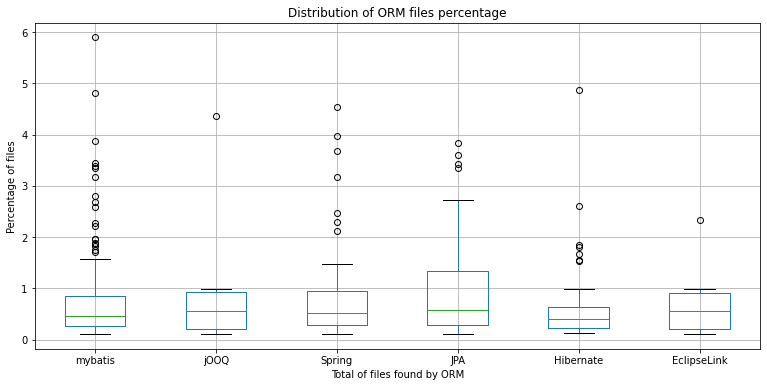

In [ ]:
import matplotlib.pyplot as plt

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[4]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

plt.figure(figsize =(13, 6))
stud_bplt = df.boxplot(column=['mybatis', 'jOOQ', 'Spring', 'JPA', 'Hibernate', 'EclipseLink']);
stud_bplt.plot()
plt.title("Distribution of ORM files percentage")
plt.xlabel("ORM`s")
plt.ylabel("Percentage of files")
plt.show()



In [ ]:
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[3]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df.rename(columns = {'(Ignore, SQL)':'SQL'}, inplace = True)
df.head()

,Projects,Domains,Builder,"(IgnoreCase, SQL)"
0,Activiti,automation,1,1
1,airbyte,infrastructure management,1,1
2,airsonic,media,1,1
3,spring-cloud-alibaba,infrastructure management,1,1
4,nacos,infrastructure management,1,1


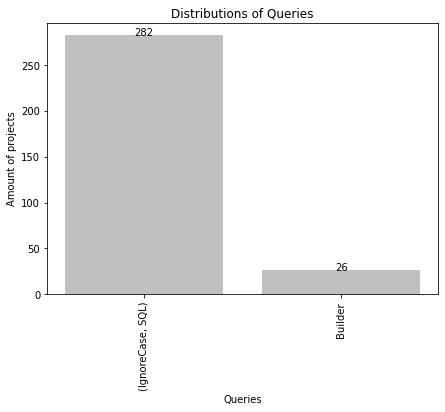

In [ ]:
plt.figure(figsize=(7,5))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center') #

df = df.iloc[: , 2:].sum().sort_values(ascending=False)
plt.bar(df.index, df.values, color='silver')
addlabels(df.index, df.values)
plt.xticks(rotation=90)

plt.title("Distributions of Queries")
plt.xlabel("Queries")
plt.ylabel("Amount of projects")
plt.show()

In [ ]:
df.loc[:,'SumPerProject'] = df.sum(axis=1)
df.rename(columns = {'(IgnoreCase, SQL)':'SQL'}, inplace = True)
df_count_2 = df[df.SumPerProject == 2].count()
print(df_count_2)
df_count_sql = df[df.SQL ==1].count()
print(df_count_sql)
df_count_builder = df[df.Builder == 1].count()
print(df_count_builder)
df_count_0 = df[df.SumPerProject == 0].count()
print(df_count_0)

Projects         26
Domains          26
Builder          26
SQL              26
SumPerProject    26
dtype: int64
Projects         282
Domains          282
Builder          282
SQL              282
SumPerProject    282
dtype: int64
Projects         26
Domains          26
Builder          26
SQL              26
SumPerProject    26
dtype: int64
Projects         40
Domains          40
Builder          40
SQL              40
SumPerProject    40
dtype: int64


/home/fredlinux/.pyenv/versions/3.7.9/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Type of file', ylabel='total'>

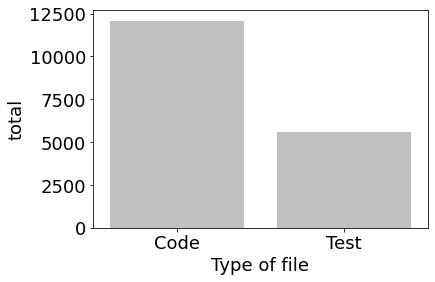

In [ ]:
import seaborn as sns

number_of_files = pd.read_excel('../resources/number_of_files.xlsx')

total_code_files = number_of_files['Code'].sum()
total_test_files = number_of_files['Test'].sum()

dados = {
    'Type of file': ['Code', 'Test'],
    'total': [total_code_files, total_test_files]
}

dados = pd.DataFrame(dados)

sns.barplot(x = 'Type of file', y = 'total', data = dados, color = 'silver')

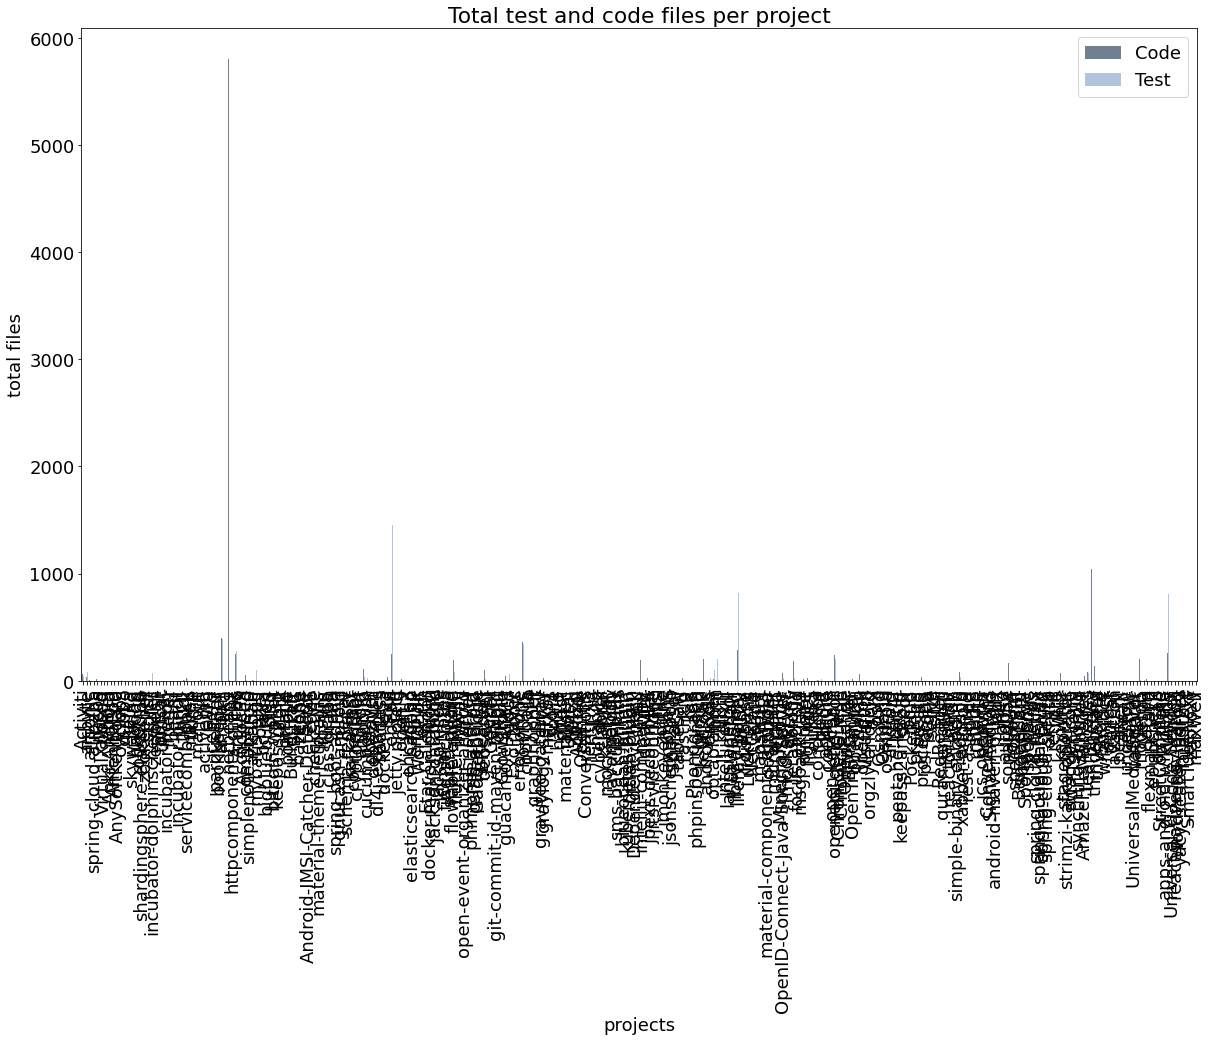

In [ ]:
type_of_files  = number_of_files[['Project', 'Code', 'Test']]
type_of_files = type_of_files.set_index('Project')

type_of_files.iloc[0:].plot(kind='bar', title="Total test and code files per project", color = ['slategrey', 'lightsteelblue'])
plt.xlabel("projects")
plt.ylabel("total files")
plt.rcParams.update({'font.size': 18})
plt.gcf().set_size_inches(20, 12)